Частина перша: Знайомство з Pandas.

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання

Необхідно виконати:

1. Вивести перші рядки таблиці за допомогою методу head
2. Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
3. Замініть у таблиці значення "—" на значення NaN
4. Визначте типи всіх стовпців за допомогою dataframe.dtypes
5. Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
6. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
7. Видаліть з таблиці дані по всій країні, останній рядок таблиці
8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
9. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
10. У якому регіоні була найвища народжуваність у 2014 році?
11. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році


             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
Shape of the dataframe: (28, 9)
Data types of columns:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object
Percentage of missing values in each column: Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64
Regions with birth rate higher than the national average in 2019:
['Крим', 'Волинська', 'Донецька', 'Закарпатська', 'Іван

/var/folders/6b/bfj9mxv51011ybz2092p3n8c0000gn/T/ipykernel_34435/835412405.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, 1:] = df.iloc[:, 1:].fillna(df.iloc[:, 1:].mean())


<Figure size 1200x600 with 0 Axes>

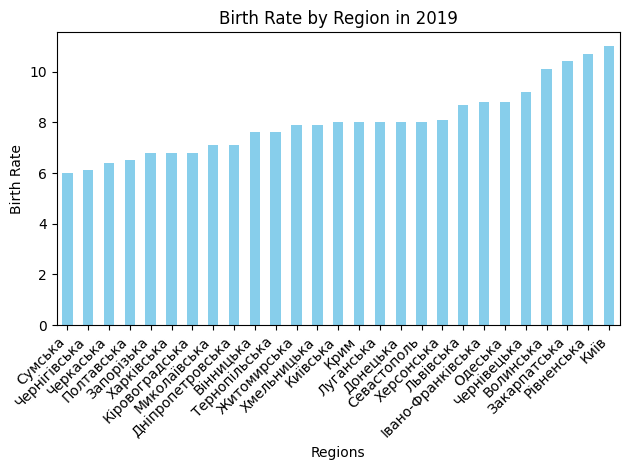

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Зчитування таблиці з Вікіпедії
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
df = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands='.', decimal=',')[0]

# Виведення перших рядків таблиці
print(df.head())

# Визначення кількості рядків та стовпців у датафреймі
print('Shape of the dataframe:', df.shape)

# Заміна '—' на NaN
df = df.replace('—', pd.NA)

# Виведення типів даних колонок
print('Data types of columns:')
print(df.dtypes)

# Заміна типів колонок, де є NaN, на числові
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Обчислення частки пропусків в кожному стовпці
missing_percentages = df.isnull().mean() * 100
print('Percentage of missing values in each column:', missing_percentages)

# Видалення останнього рядка (дані по всій країні)
df = df.drop(df.tail(1).index)

# Заміна відсутніх даних в стовпцях середніми значеннями
df.iloc[:, 1:] = df.iloc[:, 1:].fillna(df.iloc[:, 1:].mean())

# Список регіонів, де народжуваність у 2019 році була вищою за середню по Україні
regions_higher_than_avg_2019 = df[df['2019'] > df['2019'].mean()]['Регіон'].tolist()
print('Regions with birth rate higher than the national average in 2019:')
print(regions_higher_than_avg_2019)

# Регіон з найвищою народжуваністю у 2014 році
region_highest_birthrate_2014 = df.loc[df['2014'].idxmax()]['Регіон']
print('Region with the highest birth rate in 2014:', region_highest_birthrate_2014)

# Вибір лише регіонів та їх народжуваність у 2019 році
data_2019 = df[['Регіон', '2019']].dropna()

# Побудова графіка
plt.figure(figsize=(12, 6))
data_2019.set_index('Регіон', inplace=True)
data_2019.sort_values(by='2019').plot(kind='bar', color='skyblue', legend=False)
plt.title('Birth Rate by Region in 2019')
plt.xlabel('Regions')
plt.ylabel('Birth Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
